In [1]:
# Librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Con este comando magic de Jupyter, nos permite que se renderize los graficos de matplotlib en el Notebook
%matplotlib inline

In [3]:
# Carga de datos desde un csv, esto carga un objeto dataframe
movies = pd.read_csv('data/peliculas.csv', encoding='utf-8')

In [5]:
# solo colmunas que son numericas
num = (movies.dtypes == float) | (movies.dtypes == int)
num_cols = [item for item in num.index if num[item]]
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [6]:
# solo columnas de texto
obj = movies.dtypes == object
obj_cols = [item for item in obj.index if obj[item]]
obj_cols

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [8]:
# mostrar solo columnas numericas
movies_num = movies[num_cols]
movies_num.head()

title_year  aspect_ratio  duration  duration.1  cast_total_facebook_likes  \
0      2009.0          1.78     178.0       178.0                       4834   
1      2007.0          2.35     169.0       169.0                      48350   
2      2015.0          2.35     148.0       148.0                      11700   
3      2012.0          2.35     164.0       164.0                     106759   
4         NaN           NaN       NaN         NaN                        143   

        budget  imdb_score        gross  
0  237000000.0         7.9  760505847.0  
1  300000000.0         7.1  309404152.0  
2  245000000.0         6.8  200074175.0  
3  250000000.0         8.5  448130642.0  
4          NaN         7.1          NaN

In [9]:
# mostrar estadisticas de las columnas numericas 
movies_num.describe()

title_year  aspect_ratio     duration   duration.1  \
count  4935.000000   4714.000000  5028.000000  5028.000000   
mean   2002.470517      2.220403   107.201074   107.201074   
std      12.474599      1.385113    25.197441    25.197441   
min    1916.000000      1.180000     7.000000     7.000000   
25%    1999.000000      1.850000    93.000000    93.000000   
50%    2005.000000      2.350000   103.000000   103.000000   
75%    2011.000000      2.350000   118.000000   118.000000   
max    2016.000000     16.000000   511.000000   511.000000   

       cast_total_facebook_likes        budget   imdb_score         gross  
count                5043.000000  4.551000e+03  5043.000000  4.159000e+03  
mean                 9699.063851  3.975262e+07     6.442138  4.846841e+07  
std                 18163.799124  2.061149e+08     1.125116  6.845299e+07  
min                     0.000000  2.180000e+02     1.600000  1.620000e+02  
25%                  1411.000000  6.000000e+06     5.800000  5.340988e+06  
50%                  3090.000000  2.000000e+07     6.600000  2.551750e+07  
75%                 13756.500000  4.500000e+07     7.200000  6.230944e+07  
max                656730.000000  1.221550e+10     9.500000  7.605058e+08

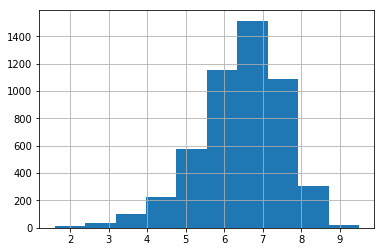

In [12]:
# verificar histograma para una columna numerica
movies_num['imdb_score'].hist() # muestra una distribucion normal

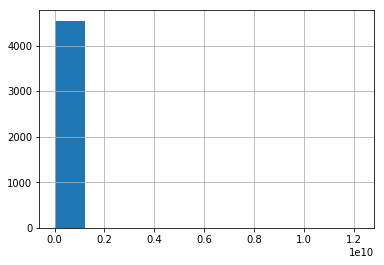

In [13]:
# el budget no muestra una distribucion normal
movies_num['budget'].hist()

In [15]:
# Para poder identificar los valores que causan esta anomalia se usa un tecnica de pandas llamada boolean filtering
# Se trata de construir una serie de booleanos con los mismos indices del dataframe
(movies_num['budget'] > 1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

## me indica que hay 6 valores con presupuesto mayor al mil millon

In [19]:
# se usa una mascara para guardar las series de booleanos y luego obtener los valores que son True del dataframe
mask = (movies_num['budget'] > 1e9)
movies[mask]

movie_title  title_year  color  aspect_ratio  duration  \
2323  Princess Mononoke       1997.0  Color          1.85     134.0   
2334           Steamboy       2004.0  Color          1.85     103.0   
2988           The Host       2006.0  Color          1.85     110.0   
3005           Fateless       2005.0  Color          2.35     134.0   
3423              Akira       1988.0  Color          1.85     124.0   
3859     Lady Vengeance       2005.0  Color          2.35     112.0   

       language      country  duration.1  \
2323   Japanese        Japan       134.0   
2334   Japanese        Japan       103.0   
2988     Korean  South Korea       110.0   
3005  Hungarian      Hungary       134.0   
3423   Japanese        Japan       124.0   
3859     Korean  South Korea       112.0   

                                                 genres content_rating  \
2323                        Adventure|Animation|Fantasy          PG-13   
2334  Action|Adventure|Animation|Family|Sci-Fi|Thriller          PG-13   
2988                         Comedy|Drama|Horror|Sci-Fi              R   
3005                                  Drama|Romance|War              R   
3423                            Action|Animation|Sci-Fi              R   
3859                                        Crime|Drama              R   

                                          plot_keywords    director_name  \
2323      anime|cult film|forest|princess|studio ghibli   Hayao Miyazaki   
2334               19th century|ball|boy|inventor|steam  Katsuhiro Ôtomo   
2988             daughter|han river|monster|river|seoul     Joon-ho Bong   
3005                   bus|death|gay slur|hatred|jewish     Lajos Koltai   
3423  based on manga|biker gang|gifted child|post th...  Katsuhiro Ôtomo   
3859  cake|christian|lesbian sex|oral sex|pregnant s...   Chan-wook Park   

          actor_1_name        actor_2_name    actor_3_name  \
2323     Minnie Driver  Jada Pinkett Smith    Billy Crudup   
2334  William Hootkins  Robin Atkin Downes  Rosalind Ayres   
2988         Doona Bae        Kang-ho Song      Ah-sung Ko   
3005      Marcell Nagy     Péter Fancsikai   Bálint Péntek   
3423      Mitsuo Iwata       Takeshi Kusao    Tesshô Genda   
3859      Min-sik Choi        Yeong-ae Lee  Hye-jeong Kang   

      cast_total_facebook_likes        budget  imdb_score      gross  
2323                       2710  2.400000e+09         8.4  2298191.0  
2334                        991  2.127520e+09         6.9   410388.0  
2988                       1173  1.221550e+10         7.0  2201412.0  
3005                         11  2.500000e+09         7.1   195888.0  
3423                         28  1.100000e+09         8.1   439162.0  
3859                        907  4.200000e+09         7.7   211667.0

## se concluye que son peliculas extranjeras y el presupuesto o budget no estaba en dolares, el autor de la base de datos analizadas no considero la moneda del budget al obtener la informacion